# FORESEE - Millicharged Particles (MCPs)

### Load Libraries 

In [1]:
import sys, os
src_path = "../../"
sys.path.append(src_path)

import numpy as np
from src.foresee import Foresee, Utility, Model
from matplotlib import pyplot as plt

## 1. Initialization 


All function that we will need are included in the FORESEE package. We start by simply initializing it: 

In [2]:
foresee = Foresee()

If MCPs are sufficiently light, they are mainly produced via pion decay. To start, let us have a look at the pion spectrum in terms of the angle with respect to the beam axis $\theta$ and the momentum $p$. This can be done using the function `get_spectrumplot` which requires the MC particle ID (or simply pid), the MC generator and the energy. The units on the coloraxis are pb/bin. 

FORESEE provides the 2D spectrum as tables for a variety of particles ($\pi^0$, $\eta$, ...), generators (SIBYLL, EPOSLHC, QGSJET, PYTHIA). The datafiles are stored in the directory `files/hadrons`. 

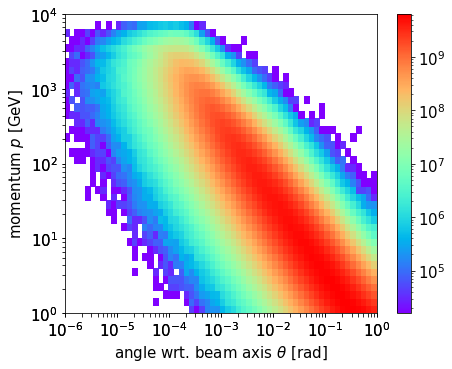

In [3]:
energy = "14"
modelname="MCP"
plot=foresee.get_spectrumplot(pid="111", generator="EPOSLHC", energy=energy)
plot.savefig("Spectrum_111_"+modelname+".pdf")
plot.show()

## 2. Specifying the Model: MCPs

The phenomenology of the MCPs can be described by the following Lagrangian

\begin{equation}
 \mathcal{L} = - m_\chi \bar \chi \chi - i Q_\chi \bar \chi \gamma^\mu A_\mu \chi
\end{equation}

with the MCP mass $m_\chi$ and the millicharge $Q_\chi = \epsilon e$ as free parameters. For the search for MCPs at forward experiments we need to know i) the *production rate*, and ii) the *interaction rate*. All these properties are specified in the `Model` class. We initialize it with the name of the model as argument. 

In [4]:
model = Model(modelname)

**Production** Most light dark sector particles are produced in the decay of primary particles. Here we need to specify the total branching fraction into the dark sector as function of the `coupling` and the `mass`. We additionally specify the variable `nsample` which specifies how often each parent particle is decayed. 

In the simplest case, the MCP is produced via two body decays of vector mesons $M \to \bar \chi \chi$ with $M = \rho, \omega, \phi, J/\psi, \psi(2S)$ and $\Upsilon(nS)$ . Following [1812.03998](https://arxiv.org/abs/1812.03998), the corresponding branching fractions are given by

\begin{equation}
\frac{\text{BR}(M \!\to\! \chi\bar\chi)}{\text{BR}(M \!\to\! ee) } 
= \epsilon^2 
\frac{(m_M^2 \!+\!2m_\chi^2)(m_M^2 \!-\! 4m_\chi^2)^{1/2}} {(m_M^2 \!+\! 2m_e^2)(m_M^2 \!-\! 4m_e^2)^{1/2}} \ . 
\end{equation}

(For faster running, we comment out some subleading channels)

In [5]:
nsample = 50

model.add_production_2bodydecay(
    pid0 = "113",
    pid1 = "0",
    br = "2 * 4.72e-5 * coupling**2 * ((1+2*(mass/self.masses('pid0'))**2)*np.sqrt(1-4*(mass/self.masses('pid0'))**2) )/( (1+2*(self.masses('11')/self.masses('pid0'))**2)*np.sqrt(1-4*(self.masses('11')/self.masses('pid0'))**2) )",
    generator = "EPOSLHC",
    energy = energy,
    nsample = nsample,
)

#model.add_production_2bodydecay(
#    pid0 = "223",
#    pid1 = "0",
#    br = "2 * 7.36e-5 * coupling**2 * ((1+2*(mass/self.masses('pid0'))**2)*np.sqrt(1-4*(mass/self.masses('pid0'))**2) )/( (1+2*(self.masses('11')/self.masses('pid0'))**2)*np.sqrt(1-4*(self.masses('11')/self.masses('pid0'))**2) )",
#    generator = "EPOSLHC",
#    energy = energy,
#    nsample = nsample,
#)

#model.add_production_2bodydecay(
#    pid0 = "333",
#    pid1 = "0",
#    br = "2 * 2.97e-4 * coupling**2 * ((1+2*(mass/self.masses('pid0'))**2)*np.sqrt(1-4*(mass/self.masses('pid0'))**2) )/( (1+2*(self.masses('11')/self.masses('pid0'))**2)*np.sqrt(1-4*(self.masses('11')/self.masses('pid0'))**2) )",
#    generator = "EPOSLHC",
#    energy = energy,
#    nsample = nsample,
#)

model.add_production_2bodydecay(
    pid0 = "443",
    pid1 = "0",
    br = "2 * 0.0597 * coupling**2 * ((1+2*(mass/self.masses('pid0'))**2)*np.sqrt(1-4*(mass/self.masses('pid0'))**2) )/( (1+2*(self.masses('11')/self.masses('pid0'))**2)*np.sqrt(1-4*(self.masses('11')/self.masses('pid0'))**2) )",
    generator = "Pythia8",
    energy = energy,
    nsample = nsample,
)

#model.add_production_2bodydecay(
#    pid0 = "100443",
#    pid1 = "0",
#    br = "2 * 0.00993 * coupling**2 * ((1+2*(mass/self.masses('pid0'))**2)*np.sqrt(1-4*(mass/self.masses('pid0'))**2) )/( (1+2*(self.masses('11')/self.masses('pid0'))**2)*np.sqrt(1-4*(self.masses('11')/self.masses('pid0'))**2) )",
#    generator = "Pythia8",
#    energy = energy,
#    nsample = nsample,
#)

model.add_production_2bodydecay(
    pid0 = "553",
    pid1 = "0",
    br = "2 * 0.0238 * coupling**2 * ((1+2*(mass/self.masses('pid0'))**2)*np.sqrt(1-4*(mass/self.masses('pid0'))**2) )/( (1+2*(self.masses('11')/self.masses('pid0'))**2)*np.sqrt(1-4*(self.masses('11')/self.masses('pid0'))**2) )",
    generator = "Pythia8",
    energy = energy,
    nsample = nsample,
)

#model.add_production_2bodydecay(
#    pid0 = "100553",
#    pid1 = "0",
#    br = "2 * 0.0191 * coupling**2 * ((1+2*(mass/self.masses('pid0'))**2)*np.sqrt(1-4*(mass/self.masses('pid0'))**2) )/( (1+2*(self.masses('11')/self.masses('pid0'))**2)*np.sqrt(1-4*(self.masses('11')/self.masses('pid0'))**2) )",
#    generator = "Pythia8",
#    energy = energy,
#    nsample = nsample,
#)

#model.add_production_2bodydecay(
#    pid0 = "200553",
#    pid1 = "0",
#    br = "2 * 0.0218 * coupling**2 * ((1+2*(mass/self.masses('pid0'))**2)*np.sqrt(1-4*(mass/self.masses('pid0'))**2) )/( (1+2*(self.masses('11')/self.masses('pid0'))**2)*np.sqrt(1-4*(self.masses('11')/self.masses('pid0'))**2) )",
#    generator = "Pythia8",
#    energy = energy,
#    nsample = nsample,
#)

The MCP can also be produced in 3-body decays of pseudoscalar mesons $M \to \gamma \bar\chi \chi$ via an offshell photon. This can be added using the function `add_production_3bodydecay()`. It requires to provide `br` which is the differential branching fraction $d\text{BR}/(dq^2 \ d\cos\theta)$ where $q^2=(p_{\chi_1}+p_{\chi_2})^2$ and $\theta$ is the angle between $p_{\chi_1}$ in the restframe of $p_{\chi_1}+p_{\chi_2}$ and the direction of $p_{\chi_1}+p_{\chi_2}$ in the restframe of $M$. The reason for this choice of coordinates it simplified the integration boundaries. Following [1911.11346](https://arxiv.org/abs/1911.11346), the differential branching fraction for this process is given by 

\begin{equation}
\frac{d\text{BR}(M \!\to\! \gamma\chi\chi)}{dq^2 \, d\!\cos\theta}
 = \frac{\epsilon^2 \alpha}{4 \pi q^2} \Big[1\!-\!\frac{q^2}{m_M^2}\Big]^3 \Big[1-\frac{4m_\chi^2}{q^2}\Big]^{\frac12} 
  \times \Big[2 -  \Big(1-\frac{4m_\chi^2}{q^2} \Big) \sin^2 \theta \Big]  \times \text{BR}(M \!\to \!\gamma\gamma)
\end{equation}

Since we have two $\chi$'s in the final state, we multiply by an additional factor 2. In the formulas below $q$ and $\theta$ are expressed as `q` and `th`.

(For faster running, we comment out some subleading channels)

In [6]:
nsample = 10

model.add_production_3bodydecay(
    pid0 = "111",
    pid1 = "22",
    pid2 = "0",
    br = "2.*0.99 * coupling**2 * 1./137/4./3.1415/q**2 * (1-q**2/self.masses('pid0')**2)**3 * (1-4*mass**2/q**2)**0.5 * (2-(1-4*mass**2/q**2)*np.sin(th)**2)",
    generator = "EPOSLHC",
    energy = energy,
    nsample = nsample,
)

model.add_production_3bodydecay(
    pid0 = "221",
    pid1 = "22",
    pid2 = "0",
    br = "2.*0.39 * coupling**2 * 1./137/4./3.1415/q**2 * (1-q**2/self.masses('pid0')**2)**3 * (1-4*mass**2/q**2)**0.5 * (2-(1-4*mass**2/q**2)*np.sin(th)**2)",
    generator = "EPOSLHC",
    energy = energy,
    nsample = nsample,
)

#model.add_production_3bodydecay(
#    pid0 = "331",
#    pid1 = "22",
#    pid2 = "0",
#    br = "2.*0.023 * coupling**2 * 1./137/4./3.1415/q**2 * (1-q**2/self.masses('pid0')**2)**3 * (1-4*mass**2/q**2)**0.5 * (2-(1-4*mass**2/q**2)*np.sin(th)**2)",
#    generator = "EPOSLHC",
#    energy = energy,
#    nsample = nsample,
#)

Particles can also be produced directly in collisions. In the case of MCPs, this proceeds through Drell-Yan production, which is relevant at higher masses. The spectra for LLPs at some reference coupling need to be provided in the `files/direct` directory. 

In [7]:
model.add_production_direct(
    label = "DY",
    energy = energy,
    coupling_ref=1,
    masses = [
        1.001, 1.122, 1.258, 1.412, 1.501, 1.541, 1.549, 1.584, 1.778, 1.801, 
        1.821, 1.841, 1.844, 1.995, 2.238, 2.511, 2.818, 3.162, 3.548, 3.981, 
        4.466, 4.601, 4.666, 4.701, 4.731, 4.901, 5.011, 5.012, 5.101, 5.171, 
        5.178, 5.623, 6.309, 7.079, 7.943, 8.912, 10.01, 11.22, 12.58, 14.12, 
        15.84, 17.78, 19.95, 22.38, 25.11, 28.18, 31.62, 35.48, 39.81, 44.66, 
        50.11, 56.23, 63.09, 70.79, 79.43, 89.12, 100.01
    ]
)

**Interaction Rate:** To estimate the number of scattering events, we need to know the differential scattering rate with respect to the recoil energy $d\sigma/dE_r$ which in general depends is a function of the coupling $g$ (or `coupling`), the particle mass $m$ (or `mass`), the particles incoming energy $E$ (or `energy`) and the recoil energy $E_R$ (or `recoil`).  In most models can be written as $\ d\sigma/dE_r(m,g,E,E_R)\  =\  d\sigma/dE_r (m,g_*, E,E_R) \ \cdot\  g_*^2 \ / \ g^{2}$ where $g_*$ is some reference coupling. In this case, we can provide  $d\sigma/dE_r (m,g_*, E,E_R)$ at a reference coupling $g_*$ using `model.set_dsigma_drecoil_1d()`. Alternatively, one can also provide $d\sigma/dE_r(m,g,E,E_R)$ via `model.model.set_dsigma_drecoil_2d()`, which is probably a bit slower. 

For MCPs, we can follow Eq. (6) of [1902.03246](https://arxiv.org/pdf/1902.03246.pdf) and write 
\begin{equation}
 \frac{d\sigma}{d E_R} 
 = \frac{\alpha \epsilon^2 e^2}{E_\chi^2 E_R} \left( \frac{E_\chi^2}{2 m_e E_R} - \frac{m_\chi^2}{4 m_e^2} \right) 
 = \frac{2 \pi \alpha^2 \epsilon^2 }{m_e} \left(\frac{1}{E_R^2} - \frac{m_\chi^2}{2m_e E_R E_\chi^2}\right)
\end{equation}

In [8]:
model.set_dsigma_drecoil_1d(
    dsigma_der="2.0*3.1415/(137.**2)/self.masses('11') * (1/recoil**2 - mass**2 / (2*self.masses('11')*recoil*energy**2))", 
    recoil_max = "2 * self.masses('11') * (energy**2-mass**2) / (self.masses('11')*(2*energy+mass) + mass**2)",
    coupling_ref=1
)

## 3. Generate LLP Spectra

After we have specified the model, let us generate the LLP spectra. We first set the model we just created. 

In [9]:
foresee.set_model(model=model)

Let's first look at one benchmark scenario with $m_{\chi}=2$ GeV and $\epsilon=1$ using the function `foresee.get_llp_spectrum()`.  By default, the result are saved in the `model/LLP_spectra` directory. However, here set `save_file=False` since we don't want to save the results but set `do_plot=True` to plot them. 

save data to file: ./model/LLP_spectra/14TeV_553_Pythia8_m_2.npy
save data to file: ./model/LLP_spectra/14TeV_DY_True_m_2.npy


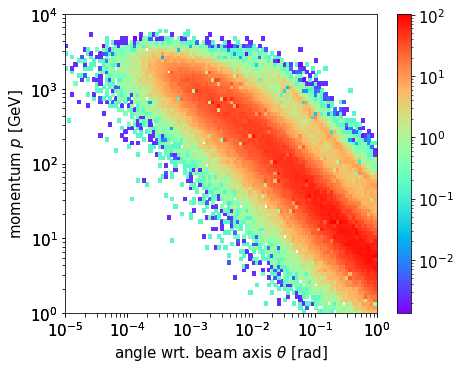

In [10]:
plt = foresee.get_llp_spectrum(mass=2, coupling=1, do_plot=True, )
plot.savefig("Spectrum_"+modelname+".pdf")
plt.show()

We can now produce a set of LLP spectra for various masses (chosen to be equally spaced in log(mass)) and unit coupling and save them.  

In [11]:
masses = [float(x) for x in ['{:0.4e}'.format(m) for m in np.logspace(-2,2,20+1)]]
for mass in masses:foresee.get_llp_spectrum(mass=mass,coupling=1)

## 4. Count Eventrate in Detector

Before counting the number of interactions with the detector material, let us specify the detector geometry. For this we need

- the `distance` of the detectot from the IP in meter (default: 480)
- the `length` of the detector in meter (default: 5)
- the `luminosity` in units of fb^-1 (default: 3000)
- the `selection` depending in `x.x` and `x.y` (default: `np.sqrt(x.x**2 + x.y**2)< 1`)
- the `numberdensity` of target particles in the detector in $1/m^3$ (default: 3.754e+29 for LAr)
- the `ermin` and `ermax` as minimum and maximum recoil energy of the analysis (default: 0.03 and 1 GeV)

The default correspond to the FASER2 detector (for LLP seraches). For FLArE10 we need to modify things a bit. 

In [12]:
distance, selection, length, luminosity = 620, "abs(x.x)<0.5 and abs(x.y)<0.5", 7, 3000
numberdensity , ermin, ermax = 3.754e+29, 0.03, 1.
foresee.set_detector(
    distance=distance, 
    selection=selection, 
    length=length, 
    luminosity=luminosity, 
    numberdensity=numberdensity, 
    ermin=ermin, 
    ermax=ermax
)

Let us look for one specific dark photon mass $m_{\chi}=1$ GeV at how many particle decay inside the decay volume. This can be done using `get_events_interaction()` for which we need to specify again the mass and filename. Additionally, we can specify 

- the `couplings` for which we evaluate the event rate as numpy array (default `np.logspace(-8,-3,51)`)
- the `preselectioncuts` when reading the LLP spectra in terms of momentum `p` and angle `th` (default: `th<0.01 and p>100`)
- the number `nsample` describing how many randomly choosen values of $\phi_{LLP}$ should sampled (default 1). This is only relevant for detectors that are not cylyndrical or not centered around the beam axis. 
- the production `modes` which should be considered
- the `energy` of the experiments

In [13]:
mass=2
output = foresee.get_events_interaction(mass=mass, energy=energy, couplings=np.logspace(-4,-2,3), nsample=1)
coups, nsigs, momenta, weights = output
for coup,nsig in zip(coups, nsigs):
    try:
        print ("g =", '{:5.3e}'.format(coup), ": nsig =", '{:5.3e}'.format(nsig))
    except:
        #nsig is np.array, format may have issues handling it depending on Python version
        print ("g =", '%5.3e' % coup, ": nsig =", '%5.3e' % nsig)

g = 1.000e-04 : nsig = 1.344e-06
g = 1.000e-03 : nsig = 1.344e-02
g = 1.000e-02 : nsig = 1.344e+02


The previous function also outputs the energy distribution of the dark photons which decay inside the detector. Let's have a look at them.

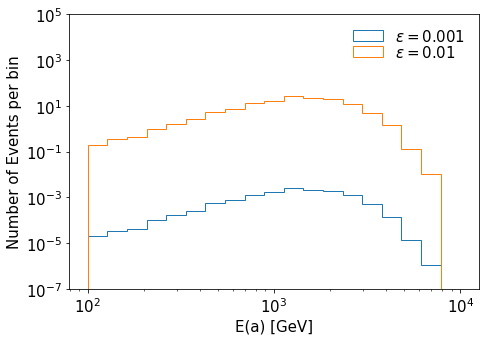

In [14]:
fig = plt.figure(figsize=(7,5))
ax = plt.subplot(1,1,1)
for coup,weight in zip(coups,weights):
    if sum(weight)<10**-5 : continue
    ax.hist([p.e for p in momenta], weights=weight, bins=np.logspace(2,4, 20), histtype='step', label=r"$\epsilon=$"+str(coup)) 
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_ylim(10**-7,10**5) 
    ax.set_xlabel("E(a) [GeV]") 
    ax.set_ylabel("Number of Events per bin") 
    ax.legend(frameon=False, labelspacing=0)
plt.tight_layout()
plt.savefig("E_distribution_"+modelname+".pdf")
plt.show()

## 5. Parameter Scan

In the following, we will get the LLP sensitivity reach for different detector configuraions. As an example, we show the FASER2 reach for dark photons for 3 scenarios. We just need to loop over different masses and use the previously introduced funtion `get_events`. The results will be written into a `.npy` file that we can store and plot later.

- the nominal/default setup

In [15]:
#specify setup
luminosity, distance, length = 3000, 620, 7
setup, selection, channels = "default", "abs(x.x)<0.5 and abs(x.y)<0.5", None
numberdensity, ermin, ermax = 3.754e+29, 0.03, 1
foresee.set_detector(distance=distance, selection=selection, length=length, luminosity=luminosity, 
    numberdensity=numberdensity, ermin=ermin, ermax=ermax, )

#get reach 
list_nevents = []    
for mass in masses:
    outout=foresee.get_events_interaction(mass=mass, energy=energy, couplings = np.logspace(-5,0,51), nsample=10)
    couplings, nevents, _, _  = outout
    list_nevents.append(nevents.flatten())

#save results
resultpath = "model/results/"
if not os.path.exists(resultpath):
    os.mkdir(resultpath)
np.save(resultpath+energy+"TeV_"+setup+".npy",np.array([masses,couplings,list_nevents],dtype=object))

## 6. Plot the Results - Configurations

Now let's plot the results. We first specify all detector setups for which we want to show result (filename in model/results directory, label, color, linestyle, opacity alpha for filled contours, required number of events).

In [16]:
setups = [
    ["14TeV_default.npy"      , "FLArE"  , "red"      ,     "solid" , 0., 3],
]

Then we specify all the existing bounds (filename in model/bounds directory, label, label position x, label position y, label rotation)

In [17]:
bounds = [   
    ["bounds_CMS.txt"             , "CMS"          ,  5.0e+1, 4.0e-1, 0  ],
    ["bounds_Colliders.txt"       , "LEP"          ,  2.0e+1, 3.0e-1, 0  ],
    ["bounds_BEBC.txt"            , "BEBC"         ,  1.3e-1, 1.5e-3, 0  ],
    ["bounds_SLAC.txt"            , "SLAC"         ,  7.5e-2, 1.3e-3, 90 ],
    ["bounds_LSND.txt"            , "LSND"         ,  1.2e-2, 3.1e-4, 0  ],
    ["bounds_ArgoNeuT.txt"        , "ArgoNeuT"     ,  1.2e-2, 3.5e-3, 5  ],
    ["bounds_milliQan_proto.txt"  , "Proto MQ"     ,  1.2e-2, 8.0e-3, 5  ],
]

bounds2 = [   
    ["bounds_RRS.txt"             , "RRS"          ,  5.0e+1, 4.0e-3, 0  ],
    ["bounds_XQC.txt"             ,               "",  0.100, 1.9*10**-7, 25  ],
    ["bounds_Direct_Detection.txt",         "",  0.100, 1.9*10**-7, 25  ],
]


We then specify other projected sensitivitities (filename in model/bounds directory, color, label, label position x, label position y, label rotation)

In [18]:
projections = [
    ["limits_DUNE.txt"            , "darkblue"     , "DUNE"         , 6.0e+0, 1.0e-1, 0  ],
    ["limits_FerMINI.txt"         , "deepskyblue"  , "FerMINI"      , 1.7e+0, 1.4e-3, 0  ],
    ["limits_FORMOSA.txt"         , "blue"         , "FORMOSA"      , 1.2e+1, 1.4e-3, 0  ],
    ["limits_milliQan.txt"        , "dodgerblue"   , "milliQan"     , 5.5e+0, 5.2e-3, 0  ],
    ["limits_SUBMET.txt"          , "cyan"         , "SUBMET"       , 2.5e-1, 8.0e-4, 0  ],
]

Finally, we can plot everything using `foresee.plot_reach()`. It returns a matplotlib instance, to which we can add further lines and which we can show or save. Below, we add the dark matter relict target line for a specific benchmark.

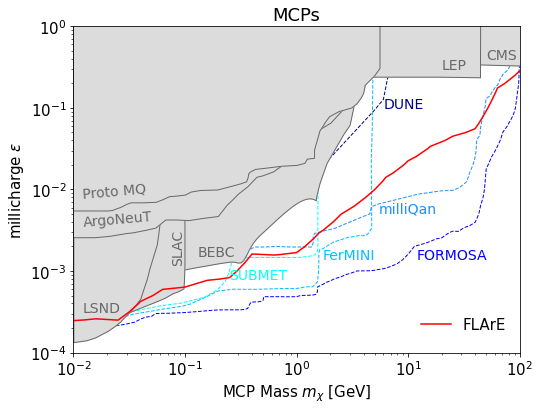

In [19]:
plot = foresee.plot_reach(
    setups=setups,
    bounds=bounds,
    bounds2=[],
    projections=projections,
    title="MCPs", 
    xlims = [0.01,100], 
    ylims = [10**-4,1],
    xlabel=r"MCP Mass $m_{\chi}$ [GeV]", 
    ylabel=r"millicharge $\epsilon$",
    legendloc=(1,0.15),
    figsize=(8,6),
)

plot.savefig("Reach_"+modelname+".pdf")
plot.show()

## 7. Plot Production Cross Section 

We can also plot the production cross section as a function of the particle mass via `foresee.plot_production`. We do this below to show the production rate associated with different channels (commenting out the subleading channels): 

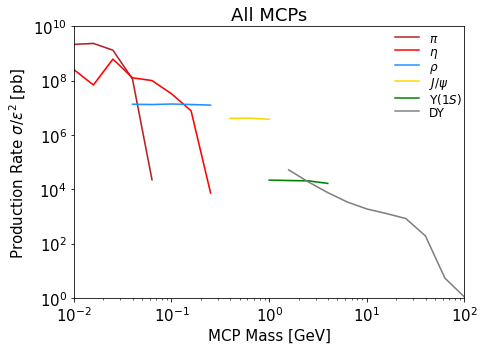

In [20]:
productions = [
    {"channels": ["111"   ] , "massrange": [0.01,0.08],"color": "firebrick"   , "label": r"$\pi$"         , "generators": ["EPOSLHC"]},   
    {"channels": ["221"   ] , "massrange": [0.01,0.3], "color": "red"         , "label": r"$\eta$"        , "generators": ["EPOSLHC"]},   
#   {"channels": ["331"   ] , "massrange": [0.03,10] , "color": "salmon"      , "label": r"$\eta'$"       , "generators": ["EPOSLHC"]},  
    {"channels": ["113"   ] , "massrange": [0.03,0.3] , "color": "dodgerblue"  , "label": r"$\rho$"        , "generators": ["EPOSLHC"]},   
#   {"channels": ["223"   ] , "massrange": [0.03,10] , "color": "blue"        , "label": r"$\omega$"      , "generators": ["Pythia8"]},   
#   {"channels": ["333"   ] , "massrange": [0.03,10] , "color": "deepskyblue" , "label": r"$\phi$"        , "generators": ["Pythia8"]},  
    {"channels": ["443"   ] , "massrange": [0.3,1]  , "color": "gold"        , "label": r"$J/\psi$"      , "generators": ["Pythia8"]},   
#   {"channels": ["100443"] , "massrange": [0.3,10]  , "color": "orange"      , "label": r"$\psi(2S)$"    , "generators": ["Pythia8"]},  
    {"channels": ["553"   ] , "massrange": [0.8,4]  , "color": "green"       , "label": r"$\Upsilon(1S)$", "generators": ["Pythia8"]},   
#   {"channels": ["100553"] , "massrange": [0.8,10]  , "color": "limegreen"   , "label": r"$\Upsilon(2S)$", "generators": ["Pythia8"]},  
#   {"channels": ["200553"] , "massrange": [0.8,10]  , "color": "lime"        , "label": r"$\Upsilon(3S)$", "generators": ["Pythia8"]},  
    {"channels": ["DY"    ] , "massrange": [1.1,102] , "color": "gray"        , "label": "DY"             , "generators": ["True"]},   
]

foresee.plot_production(
    masses = masses, 
    productions = productions,
    condition="True", 
    xlims=[0.01,100],ylims=[10**0,10**10], 
    xlabel=r"MCP Mass [GeV]", 
    ylabel=r"Production Rate $\sigma/\epsilon^2$ [pb]",
    legendloc=(1.02,1.02),
    fs_label=12,
    title="All MCPs",
)

plot.savefig("Prod_All_"+modelname+".pdf")
plot.show()

We can also also do this after applying additional conditions. Below we do this by requiring the particle to be within 1 mrad within the beam axis using the `condition` option.  

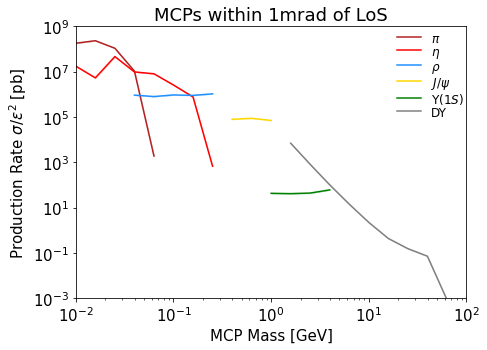

In [21]:
foresee.plot_production(
    masses = masses, 
    productions = productions,
    condition="logth<-3", 
    xlims=[0.01,100],ylims=[10**-3,10**9], 
    xlabel=r"MCP Mass [GeV]", 
    ylabel=r"Production Rate $\sigma/\epsilon^2$ [pb]",
    legendloc=(1.02,1.02),
    fs_label=12,
    title="MCPs within 1mrad of LoS"
)

plot.savefig("Prod_1mrad_"+modelname+".pdf")
plot.show()